In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score , recall_score
data=pd.read_csv(r"C:\Users\Kanjookaran\Desktop\aug_train.csv")

In [2]:
data

enrollee_id      city  city_development_index  gender  \
0             8949  city_103                   0.920    Male   
1            29725   city_40                   0.776    Male   
2            11561   city_21                   0.624  Female   
3            33241  city_115                   0.789  Female   
4              666  city_162                   0.767  Female   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878    Male   
19154        31398  city_103                   0.920    Male   
19155        24576  city_103                   0.920    Male   
19156         5756   city_65                   0.802    Male   
19157        23834   city_67                   0.855     NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time course        Graduate   
3       No relevent experience                 NaN        Graduate   
4      Has relevent experience       no_enrollment         Masters   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size    company_type last_new_job  \
0                 STEM        >20          NaN             NaN            1   
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5          NaN             NaN        never   
3      Business Degree         <1          NaN         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
...                ...        ...          ...             ...          ...   
19153       Humanities         14          NaN             NaN            1   
19154             STEM         14          NaN             NaN            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156              NaN         <1      500-999         Pvt Ltd            2   
19157              NaN          2          NaN             NaN            1   

       training_hours  target  
0                  36       1  
1                  47       0  
2                  83       0  
3                  52       1  
4                   8       0  
...               ...     ...  
19153              42       1  
19154              52       1  
19155              44       0  
19156              97       0  
19157             127       0  

[19158 rows x 14 columns]

In [3]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4498
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [4]:
!pip install pivottablejs


In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from scipy import stats
from scipy.stats import norm, skew
from scipy.special import boxcox1p
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from pivottablejs import pivot_ui
import imblearn

In [6]:
data.shape # Print the number of Rows and Columns


(19158, 14)

In [7]:
data.dtypes # Gives the data types in the Data set


enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [8]:
data.corr() # Print the data correlation 

C:\Users\Kanjookaran\AppData\Local\Temp\ipykernel_13352\4191293564.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr() # Print the data correlation


enrollee_id  city_development_index  training_hours  \
enrollee_id                1.000000               -0.040455        0.000998   
city_development_index    -0.040455                1.000000        0.001920   
training_hours             0.000998                0.001920        1.000000   
target                     0.049475               -0.341665       -0.021577   

                          target  
enrollee_id             0.049475  
city_development_index -0.341665  
training_hours         -0.021577  
target                  1.000000

C:\Users\Kanjookaran\AppData\Local\Temp\ipykernel_13352\2116622599.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True) # Print the heap map of data correlation


<Axes: >

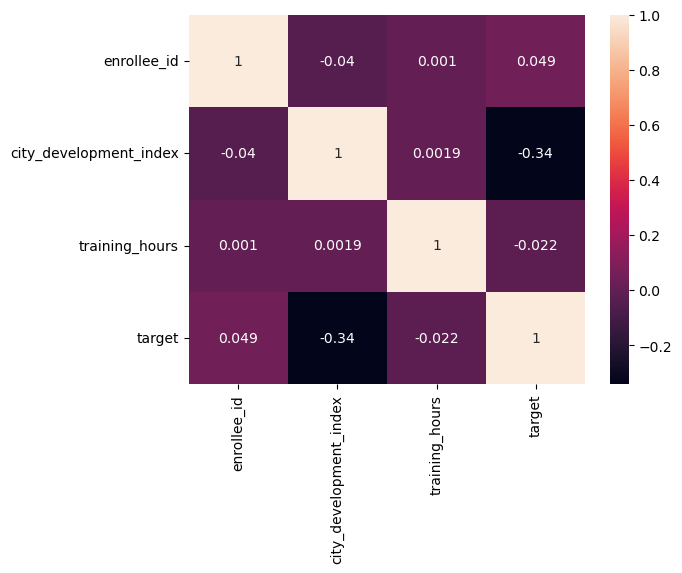

In [9]:
sns.heatmap(data.corr(), annot=True) # Print the heap map of data correlation 

In [10]:
def pie_chart(data,col):
    targets = list(data[col].value_counts().index)
    values = list((data[col].value_counts()*100/len(data[col])).values)
    fig = px.pie(values=values, names=targets,color_discrete_sequence=['darkcyan', 'lawngreen'],title=col)
    fig.show()

targets = list(data[col].value_counts().index)

This line calclates the count of unique values in the specified column (column of the data frame and stores them in the 
target list. This list will represent the categories for teh pie chart.

values = list((data[col].value_counts()*100/len(data[col])).values)

- Calculates the relative frequencies ( percentage) of each unique in the specified colmun and stores it in the values list 
These values will be used to detremine teh six=ze of each segment in the pie chart.

In [11]:
catergorical_cols= list(data.select_dtypes(include = ["object"]).dtypes.index) # Prints the categorical columns

In [12]:
catergorical_cols


['city',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

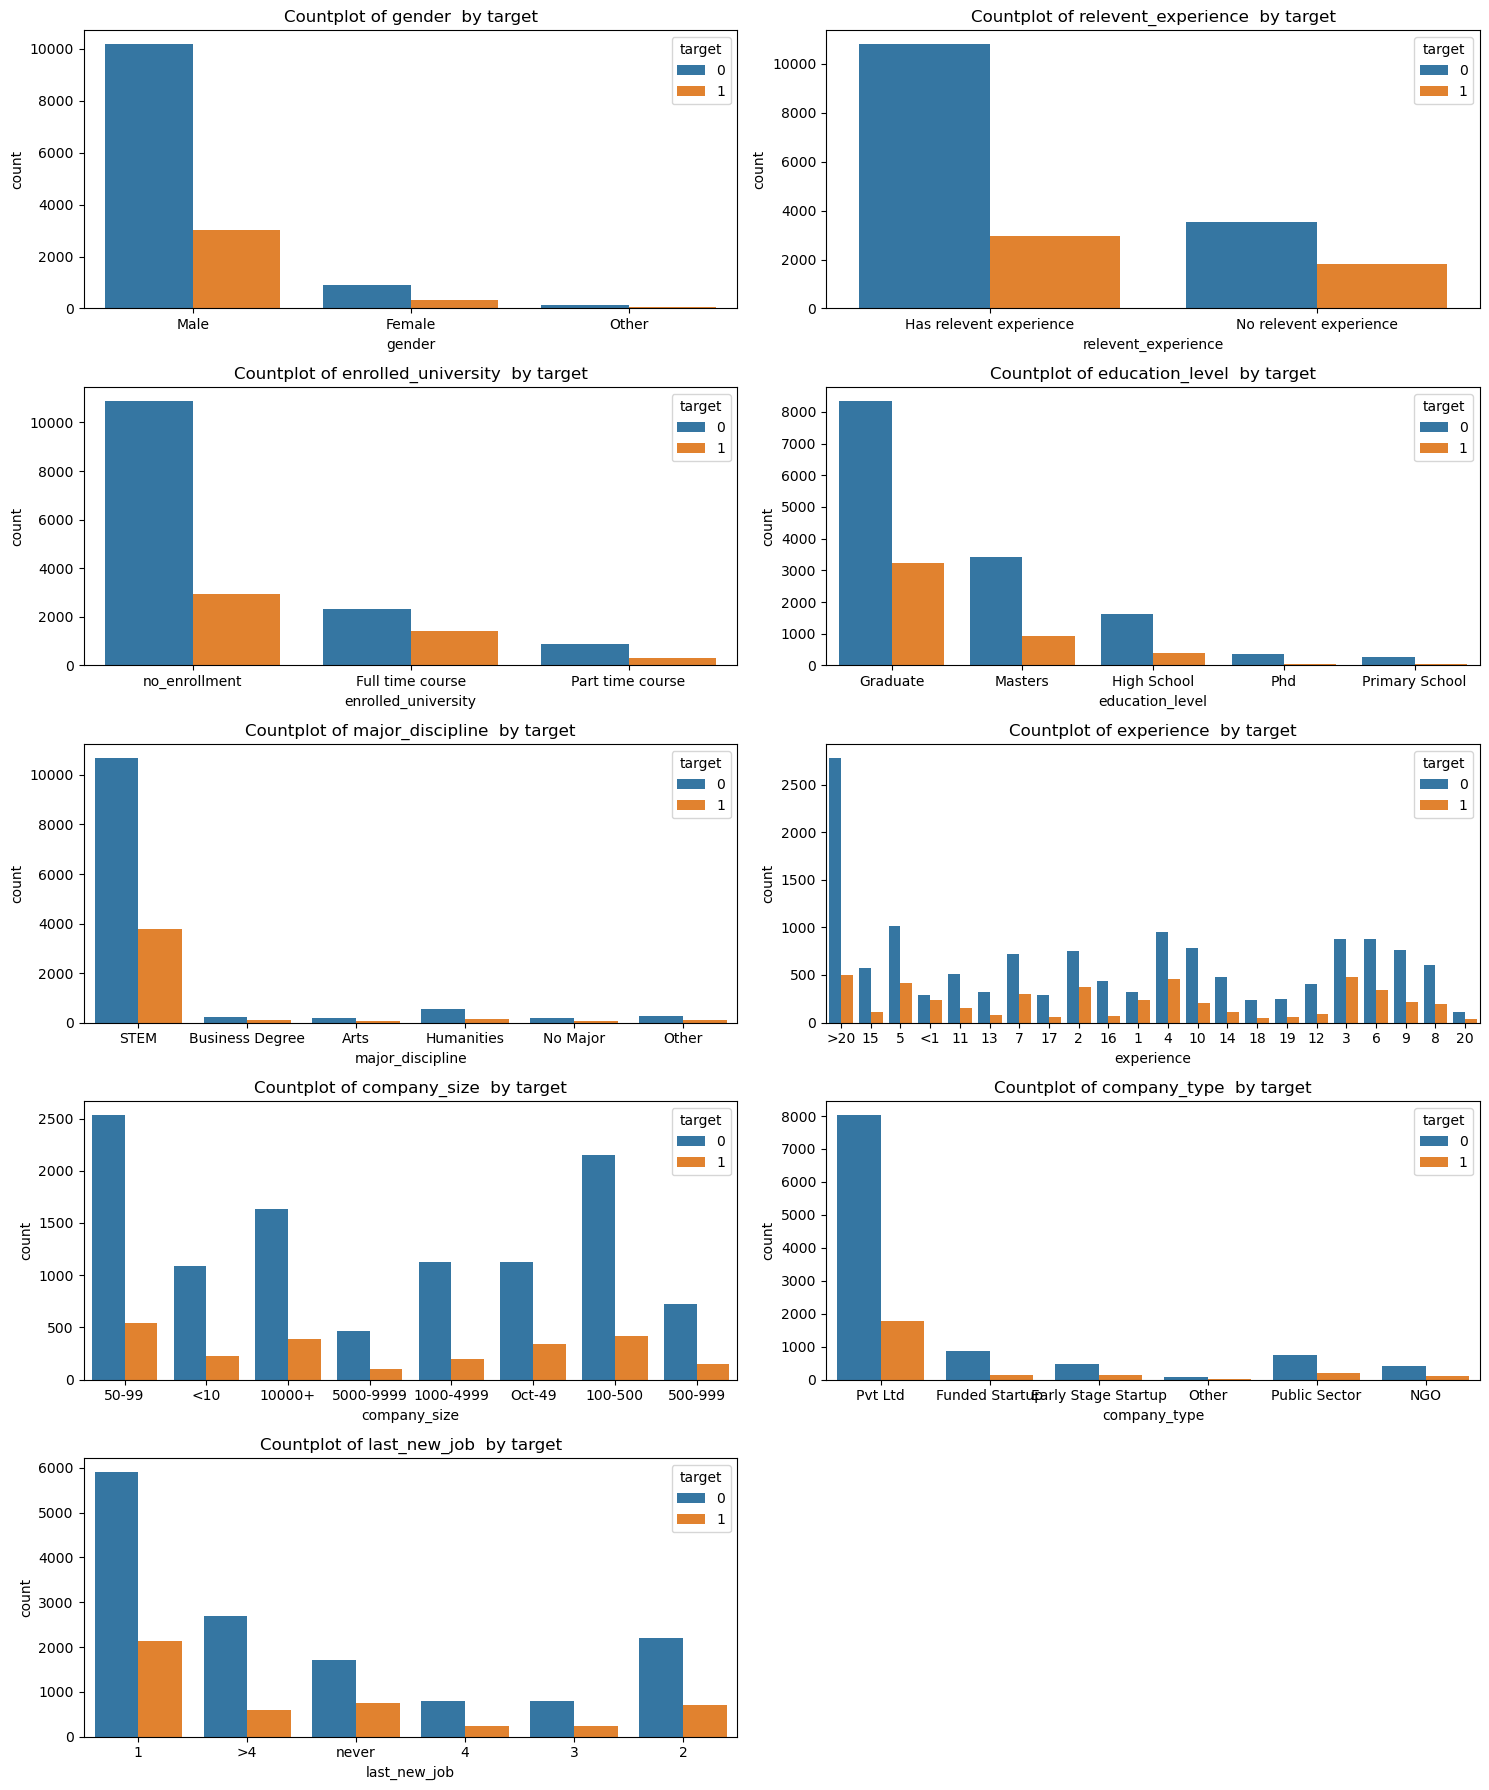

In [13]:
#Bar plots - Check frequency of features with respect to target value TV 

plt.figure(figsize=[15,18])
features = ['gender','relevent_experience','enrolled_university','education_level', 
            'major_discipline', 'experience','company_size','company_type','last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.99, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

features = ['gender','relevent_experience','enrolled_university','education_level', 
            'major_discipline', 'experience','company_size','company_type','last_new_job']
            
            This list contains the names of the categorical features for which count plot will be created.
n=1 //is used to keep track of the subplot nuber in the grid. It will create a loop that will iterate over each feature in the
features list.

 sns.countplot(x=f, hue='target', alpha=0.7, data=data)
 
 This line cretae a count plot for the current feature f , the x parameter specifies the categorical variable on the x axis 
and teh hue parameter specifies teh target variable. The alpha parameter sets the transparnecy of the bars.
 
 plt.title("Countplot of {}  by target".format(f))
 
 This sets the title of the current sub plot indicating whihc feature is being plotted.
 
 plt.tight_layout()---> This fucntion is used to adjust the spacing between subplots for better readability.

<Axes: xlabel='target', ylabel='training_hours'>

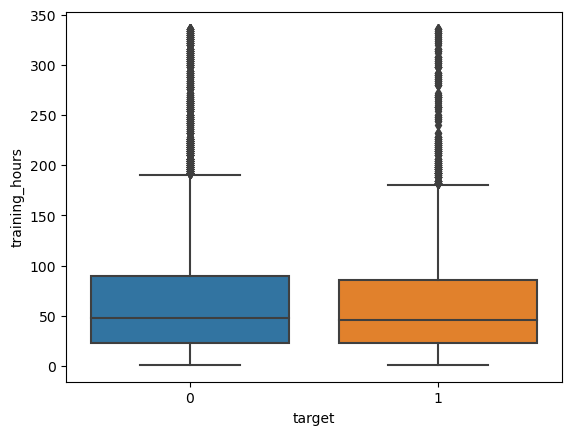

In [14]:
sns.boxplot(y="training_hours", x="target", data=data)

<Axes: xlabel='target', ylabel='training_hours'>

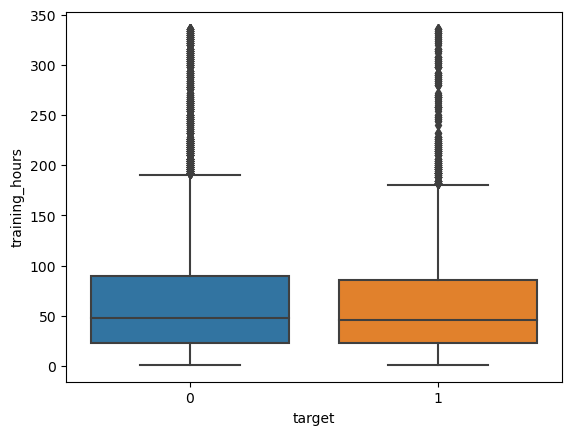

In [15]:
sns.boxplot(x="target", y="training_hours", data=data)

<Axes: xlabel='target', ylabel='city_development_index'>

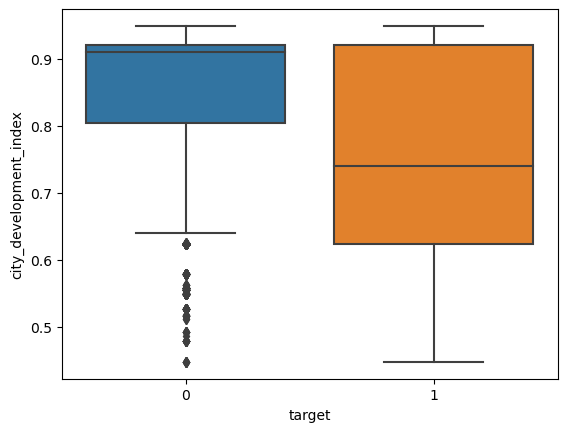

In [16]:
sns.boxplot(x="target", y="city_development_index", data=data)

In [17]:
data.dtypes


enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                      int64
dtype: object

In [18]:
data1=data[['major_discipline','education_level']].value_counts().sort_values()

In [19]:
groupdata=data.groupby(['major_discipline','education_level','target']).size().reset_index(name ='count')

In [20]:
groupdata


major_discipline education_level  target  count
0              Arts        Graduate       0    170
1              Arts        Graduate       1     38
2              Arts         Masters       0     28
3              Arts         Masters       1     14
4              Arts             Phd       0      2
5              Arts             Phd       1      1
6   Business Degree        Graduate       0    174
7   Business Degree        Graduate       1     64
8   Business Degree         Masters       0     64
9   Business Degree         Masters       1     22
10  Business Degree             Phd       0      3
11       Humanities        Graduate       0    323
12       Humanities        Graduate       1     97
13       Humanities         Masters       0    185
14       Humanities         Masters       1     40
15       Humanities             Phd       0     20
16       Humanities             Phd       1      4
17         No Major        Graduate       0    144
18         No Major        Graduate       1     50
19         No Major         Masters       0     24
20         No Major         Masters       1      5
21            Other        Graduate       0    189
22            Other        Graduate       1     83
23            Other         Masters       0     82
24            Other         Masters       1     18
25            Other             Phd       0      8
26            Other             Phd       1      1
27             STEM        Graduate       0   7338
28             STEM        Graduate       1   2906
29             STEM         Masters       0   3040
30             STEM         Masters       1    833
31             STEM             Phd       0    323
32             STEM             Phd       1     52

In [21]:
pivot_table= groupdata.pivot_table(index='major_discipline', columns= 'education_level', values = 'count', fill_value=0)

In [22]:
pivot_table

education_level   Graduate  Masters    Phd
major_discipline                          
Arts                   104     21.0    1.5
Business Degree        119     43.0    3.0
Humanities             210    112.5   12.0
No Major                97     14.5    0.0
Other                  136     50.0    4.5
STEM                  5122   1936.5  187.5

<Axes: xlabel='major_discipline'>

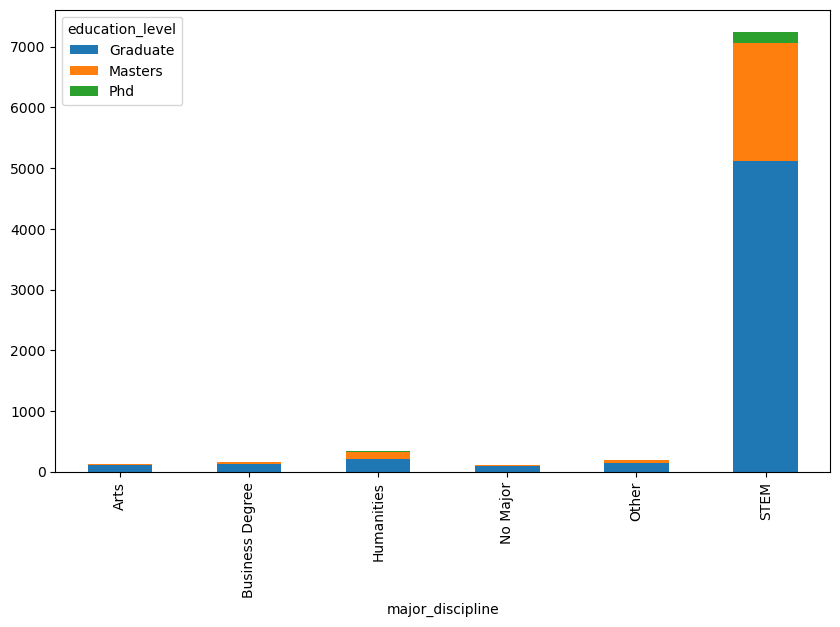

In [23]:
pivot_table.plot(kind='bar', stacked =True, figsize=(10,6))

<Axes: xlabel='major_discipline'>

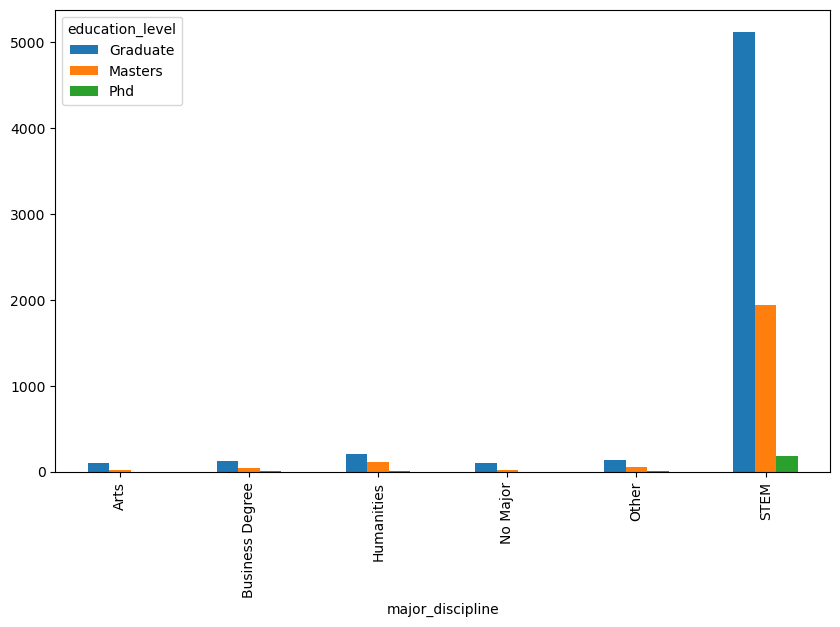

In [24]:
pivot_table.plot(kind='bar', figsize=(10,6))

In [25]:
table = pd.crosstab(data['major_discipline'], data['education_level'], data['target'], aggfunc='count')

<Axes: xlabel='major_discipline'>

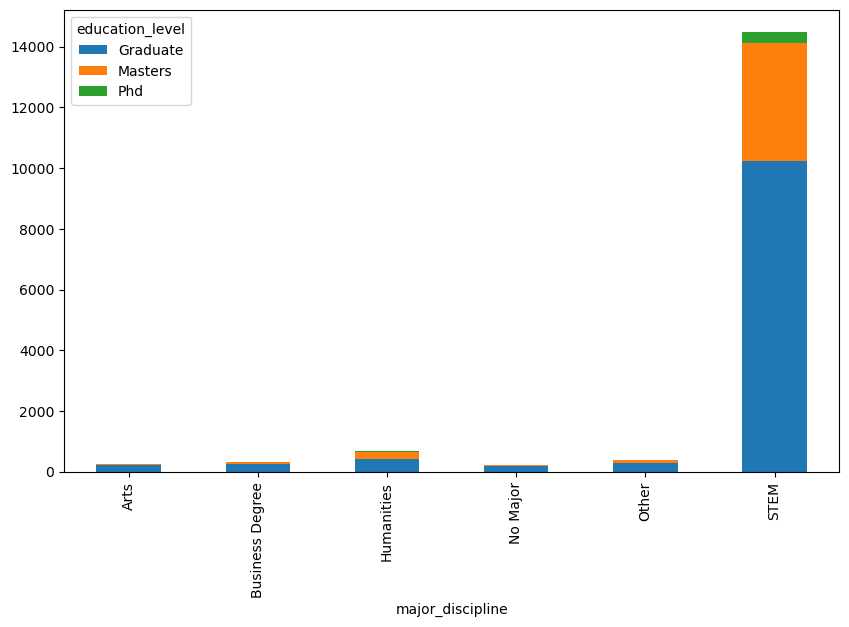

In [26]:
table.plot(kind='bar', stacked=True, figsize=(10, 6))

In [27]:
numeric_columns = list(data.select_dtypes(exclude=['object']).dtypes.index)


In [28]:
numeric_columns

['enrollee_id', 'city_development_index', 'training_hours', 'target']

C:\Users\Kanjookaran\AppData\Local\Temp\ipykernel_13352\1261240600.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['training_hours'],fit=norm)


<Axes: xlabel='training_hours', ylabel='Density'>

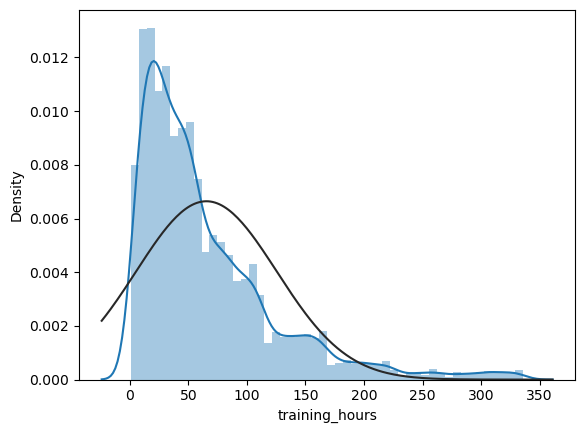

In [29]:
sns.distplot(data['training_hours'],fit=norm)

C:\Users\Kanjookaran\AppData\Local\Temp\ipykernel_13352\2763031169.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['training_hours'],fit=norm)


Text(0.5, 1.0, 'skew: 1.8190947994281477')

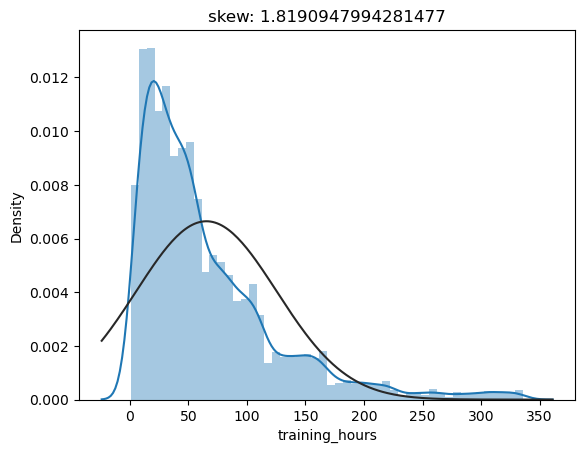

In [30]:
sns.distplot(data['training_hours'],fit=norm)
plt.title('skew: {}'.format(skew(data['training_hours'])))

C:\Users\Kanjookaran\AppData\Local\Temp\ipykernel_13352\633554175.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['training_hours'], fit = norm)


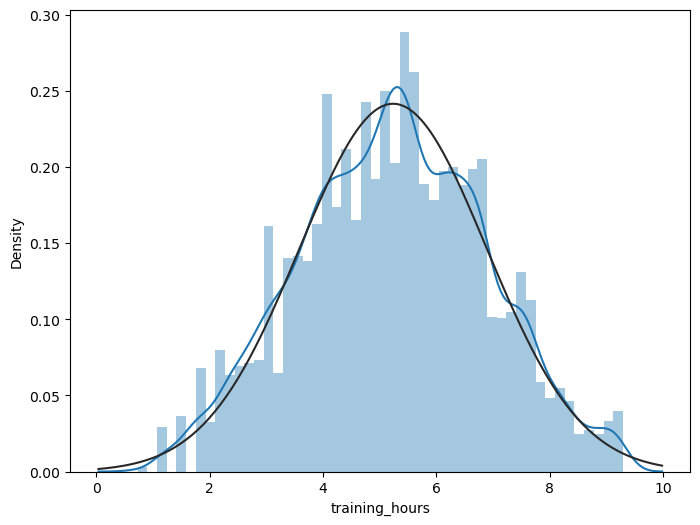

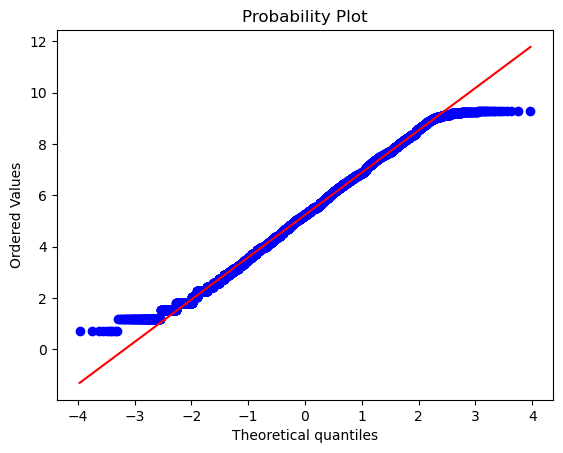

skew: -0.0006093163913336347


In [31]:
data['training_hours'] = boxcox1p(data['training_hours'], 0.15)
plt.figure(figsize=(8,6))
sns.distplot(data['training_hours'], fit = norm)
plt.show()
stats.probplot(data['training_hours'], plot = plt)
plt.show()
print('skew: {}'.format(skew(data['training_hours'])))

stats.probplot(data['training_hours'], plot = plt)
This cretaes a probabality plot (Q-Q Plot) to visualize how closely the transformed training hours data follows a normal distrubution 

plt.show()
print('skew: {}'.format(skew(data['training_hours'])))
- This calculates the skewness of transformed training hours data

Data has higher frequiency of larger values casuingteh distribution to be pulled towards the right. 

- The concnetration of data is high for higher values of training_hours data


In [32]:
data.enrolled_university = data.enrolled_university.fillna('no_enrollment') #mode

In [33]:
data.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4498
relevent_experience          0
enrolled_university          0
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [34]:
data.info


<bound method DataFrame.info of        enrollee_id      city  city_development_index  gender  \
0             8949  city_103                   0.920    Male   
1            29725   city_40                   0.776    Male   
2            11561   city_21                   0.624  Female   
3            33241  city_115                   0.789  Female   
4              666  city_162                   0.767  Female   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878    Male   
19154        31398  city_103                   0.920    Male   
19155        24576  city_103                   0.920    Male   
19156         5756   city_65                   0.802    Male   
19157        23834   city_67                   0.855     NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        G

In [35]:
data.dtypes


enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours            float64
target                      int64
dtype: object

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14660 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  float64
 13  target                  19158 non-null  int64  
dtypes: float64(2), int64(2), object(10)
me

In [37]:
data.corr() 
# Training hours and target are negative ly correlated which means whther I have more more taining hours or not 
# I am still likely to stay back or leave the company as per the case


C:\Users\Kanjookaran\AppData\Local\Temp\ipykernel_13352\2554541222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


enrollee_id  city_development_index  training_hours  \
enrollee_id                1.000000               -0.040455        0.005117   
city_development_index    -0.040455                1.000000        0.007766   
training_hours             0.005117                0.007766        1.000000   
target                     0.049475               -0.341665       -0.014742   

                          target  
enrollee_id             0.049475  
city_development_index -0.341665  
training_hours         -0.014742  
target                  1.000000

C:\Users\Kanjookaran\AppData\Local\Temp\ipykernel_13352\2137757382.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot =True)


<Axes: >

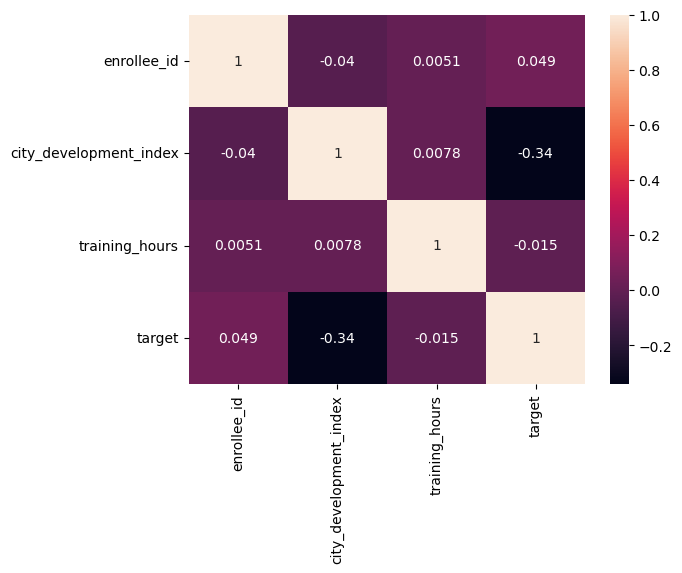

In [38]:
sns.heatmap(data.corr(), annot =True)

In [39]:
def pie_chart(data,col):
    targets = list(data[col].value_counts().index)
    values = list((data[col].value_counts()*100/len(data[col])).values)
    fig = px.pie(values=values, names=targets,color_discrete_sequence=['darkcyan', 'lawngreen'],title=col)
    fig.show()
    
    
    

In [40]:
pie_chart(data,'relevent_experience')

In [41]:
categorical_columns = list(data.select_dtypes(include=['object']).dtypes.index)
print(categorical_columns)

# Extract the categorical columns by including only  as objects. This line uses the inlcudes parameter to set to object whihc means 
#it wil lonly slect cols with dtype as objects. In pandas the object is often used to represent strings categorical variables

# .dtypes.index

#After using select_dtypes results a data that contains oly the columns with the specified data type as object.
#By accessing the dtypes attribute and then the index we will get teh names of the slected colns as pandas index object.
#after which the the list() function i sused to convert the pandas index object into a regular python list


['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job']


In [42]:
pie_chart(data,'training_hours')

def pie_chart(data,col):
    targets = list(data[col].value_counts().index)
    values = list((data[col].value_counts()*100/len(data[col])).values)
    fig = px.pie(values=values, names=targets,color_discrete_sequence=['darkcyan', 'lawngreen'],title=col)
    fig.show()
    
    definition of function with name , aparamerts to be called
    
    2. This line gets the unique categories (targets) from teh specified column of th dataframe and stores them in the target 
    list.
    
    3. This line calculates teh percentage of occurences for ach category in teh specified columns and stores them in teh values list
    4. This line creates the pie chart using Plotly Express (px.pie). The values parameters specifies teh percentage values 
    for each category, the names parameter specifies teh category l;ables( taargets) and teh color_discrete-Sequence set the color for the pie slices. Th etitle param sets teh tittle of the pie chart to the name of teh column

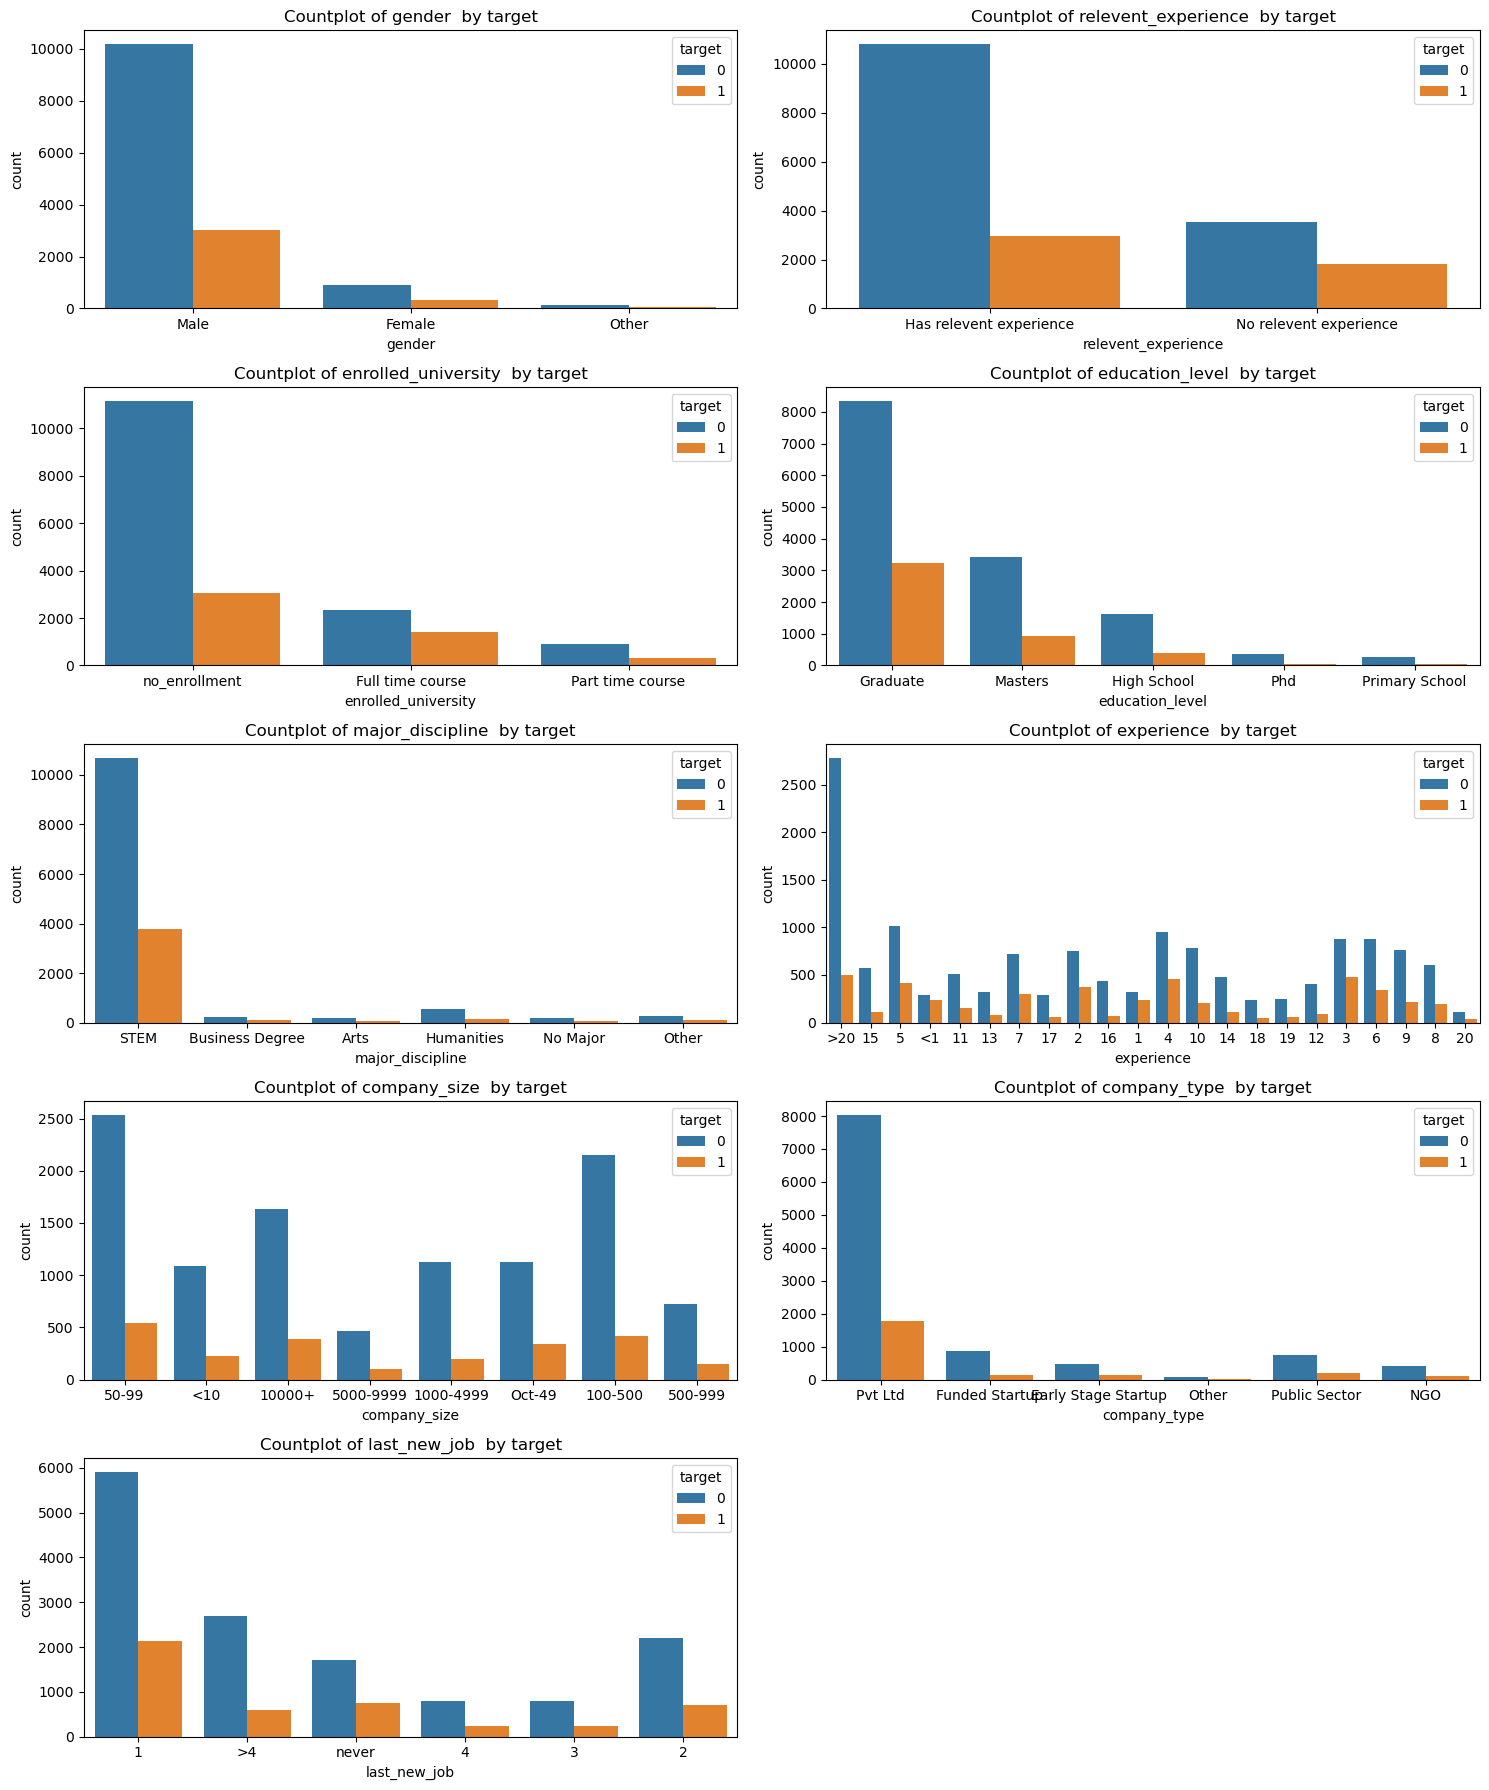

In [43]:
#Bar plots - Check frequency of feature wrt Target 

plt.figure(figsize=[15,18])
features = ['gender','relevent_experience','enrolled_university','education_level', 
            'major_discipline', 'experience','company_size','company_type','last_new_job']
n=1
for f in features:
    plt.subplot(5,2,n)
    sns.countplot(x=f, hue='target', alpha=0.99, data=data)
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

Target 0 in HR Attrition means teh group of employees who have not left the company or have not experienced attrition. In HR Analytics 
or employye churn perdiction a cpommon task is build a predictive model to identify factors or features that contribute to attrition and 
predict whihc vars are likely to leave teh teh organixayion 
. Th tagrget var i sthe binary outocome 0 or 1 which reflect whther the emplyee left or not lfet(0)

Features

A list that contains teh names of the categorical features that we want to visualize 

plt.figure(figsize=[15,18])

features = ['gender','relevent_experience','enrolled_university','education_level', 
            'major_discipline', 'experience','company_size','company_type','last_new_job']
n=1
for f in features:
// This loop itertaes over each features in the features list

    plt.subplot(5,2,n) 
    // This line cretaes a subplot within the grid. The grid has 5 rows and 3 cols per row, n represnets the index 0f the subplot whih cis updated in each iteration
    
    sns.countplot(x=f, hue='target', alpha=0.7, data=data)
    //Thi sline cretaes a count plot with the x parameters with the current feature  toplot its distribution . Th ehue parameter is set to target to distinguish the count o fteh categoris based on teh target variable . The a;lpha parameter controls the color intensity ( Tran[parency of the bars) making them slightly transparent for better visualization
    Tha dat spciofies teh dafarme data from whih the data will be used for plotting 
    
    
    plt.title("Countplot of {}  by target".format(f))
    n=n+1
plt.tight_layout()
plt.show()

<Axes: xlabel='target', ylabel='training_hours'>

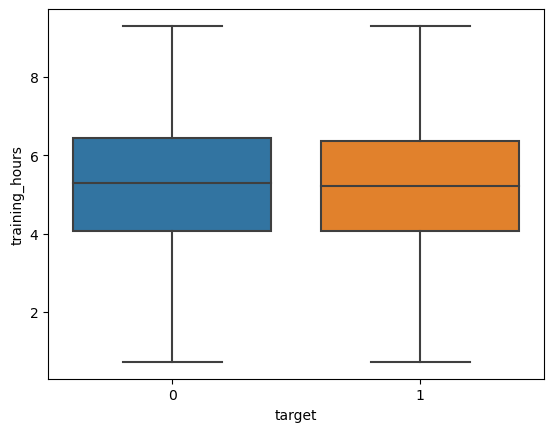

In [44]:
sns.boxplot(y='training_hours',x='target',data=data)

<Axes: xlabel='target', ylabel='city_development_index'>

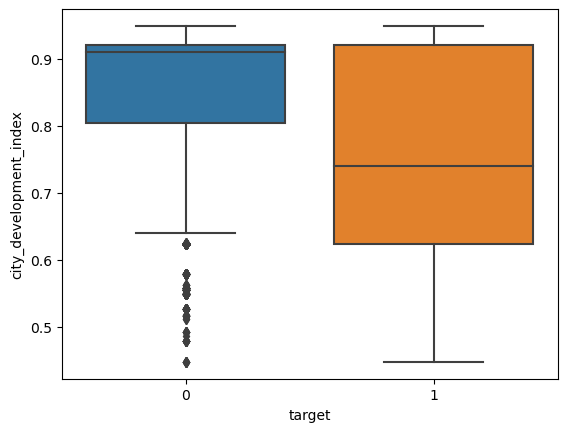

In [45]:
sns.boxplot(x='target',y='city_development_index',data=data)

<Axes: xlabel='major_discipline,education_level'>

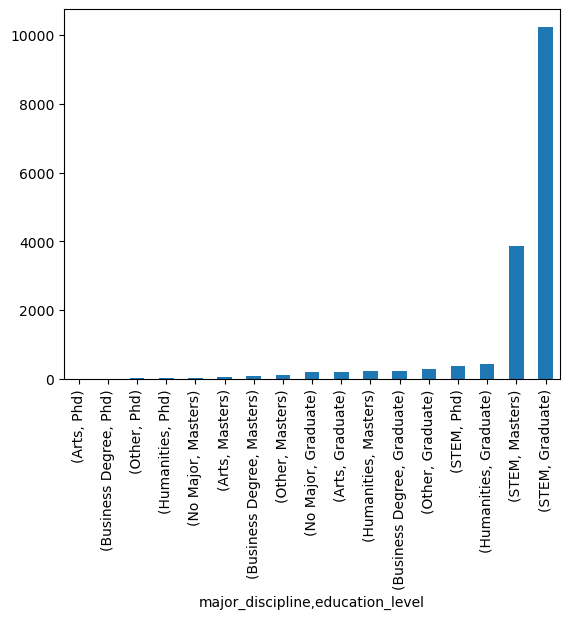

In [46]:
data[['major_discipline', 'education_level']].value_counts().sort_values().plot(kind='bar')

In [47]:
numeric_columns = list(data.select_dtypes(exclude=['object']).dtypes.index)

In [48]:
numeric_columns

['enrollee_id', 'city_development_index', 'training_hours', 'target']

C:\Users\Kanjookaran\AppData\Local\Temp\ipykernel_13352\1137875481.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




Text(0.5, 1.0, 'skew: -0.0006093163913336347')

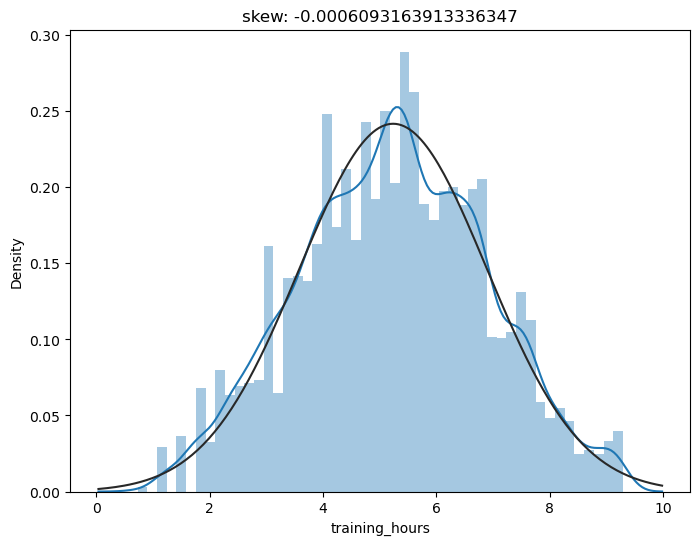

In [49]:
plt.figure(figsize=(8,6))
sns.distplot(data['training_hours'],fit=norm)
plt.title('skew: {}'.format(skew(data['training_hours'])))

C:\Users\Kanjookaran\AppData\Local\Temp\ipykernel_13352\633554175.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




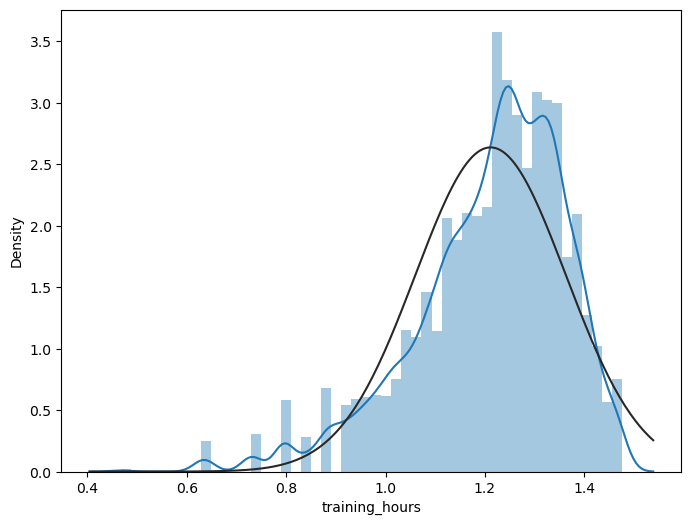

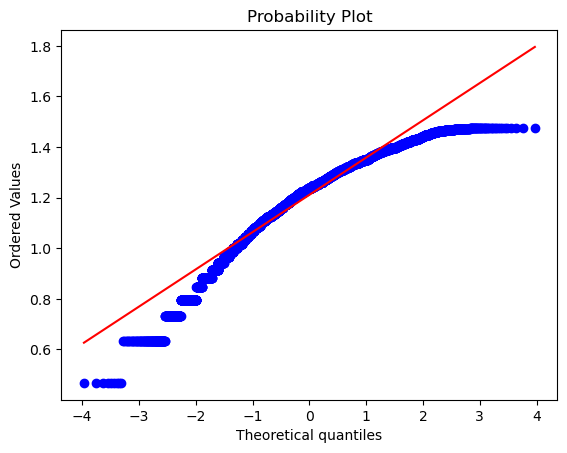

skew: -0.9765359572053354


In [93]:
data['training_hours'] = boxcox1p(data['training_hours'], 0.15)
plt.figure(figsize=(8,6))
sns.distplot(data['training_hours'], fit = norm)
plt.show()
stats.probplot(data['training_hours'], plot = plt)
plt.show()
print('skew: {}'.format(skew(data['training_hours'])))

In [94]:
data.isnull().sum()


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              1
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [98]:
data.gender.isna().sum()

0

In [99]:
data.gender.value_counts()

Male      17714
Female     1253
Other       191
Name: gender, dtype: int64

In [100]:
data.major_discipline.value_counts()

STEM               17305
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [101]:
data.enrolled_university.value_counts()

no_enrollment       14203
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [102]:
data.enrolled_university = data.enrolled_university.fillna('no_enrollment') # Filling the missingvalue with mode of the column

In [103]:
data.enrolled_university.isna().sum()

0

In [104]:
data.company_type.value_counts()

Pvt Ltd                15957
Funded Startup          1001
Public Sector            955
Early Stage Startup      603
NGO                      521
Other                    121
Name: company_type, dtype: int64

In [105]:
data.company_type = data.company_type.fillna('Pvt Ltd')

In [106]:
data.company_type.isna().sum()

0

In [107]:
data.gender = data.gender.fillna('Male')

In [108]:
data.gender.isna().sum()

0

In [109]:
data.major_discipline = data.major_discipline.fillna('STEM')

In [110]:
data.major_discipline.isna().sum()

0

In [111]:
data.education_level = data.education_level.fillna(method='ffill')
#forward fill- 
#backward fill

In [112]:
data.education_level.isna().sum()

0

Forward & Backwward fill are methods to impute missing data in a data set, mosty used to handle missing values in time series dataor sequential data. Forward fill involves filling the missing  va;lues with the most recent avaoibale valuebefore the missing postion

in othrer word it carries last observed value forward to fill the gaps cretaed by missing data

Backward fill involves filling missing values with teh most recent avaibale value after the missing postion. In this method we carry the next observed value bacward to fil the gaps cretaed by missing data. This is also used commionly in time series like forward fill.

In [113]:
# Example data with missing values
data1 = {
    'Time': ['T1', 'T2', 'T3', 'T4', 'T5'],
    'Value': [10, None, 25, None, 30]
}


In [114]:
data1


{'Time': ['T1', 'T2', 'T3', 'T4', 'T5'], 'Value': [10, None, 25, None, 30]}

In [115]:
df = pd.DataFrame(data1)


In [70]:
df

Time  Value
0   T1   10.0
1   T2    NaN
2   T3   25.0
3   T4    NaN
4   T5   30.0

In [116]:
# Forward fill
df_ffill = df.ffill()
print("DataFrame after forward fill:")
print(df_ffill)

DataFrame after forward fill:
  Time  Value
0   T1   10.0
1   T2   10.0
2   T3   25.0
3   T4   25.0
4   T5   30.0


In [117]:
data1

{'Time': ['T1', 'T2', 'T3', 'T4', 'T5'], 'Value': [10, None, 25, None, 30]}

In [118]:
df1 = pd.DataFrame(data1)

In [119]:
df1

Time  Value
0   T1   10.0
1   T2    NaN
2   T3   25.0
3   T4    NaN
4   T5   30.0

In [120]:
# Backward fill
df_bfill = df.bfill()
print("\nDataFrame after backward fill:")
print(df_bfill)


DataFrame after backward fill:
  Time  Value
0   T1   10.0
1   T2   25.0
2   T3   25.0
3   T4   30.0
4   T5   30.0


In [121]:
# Backward fill
df1_bfill = df1.bfill()
print("\nDataFrame after backward fill:")
print(df1_bfill)


DataFrame after backward fill:
  Time  Value
0   T1   10.0
1   T2   25.0
2   T3   25.0
3   T4   30.0
4   T5   30.0


In [122]:
data.education_level.value_counts()

Graduate          11890
Masters            4469
High School        2063
Phd                 420
Primary School      316
Name: education_level, dtype: int64

In [123]:
data.education_level = data.education_level.fillna(method='ffill')
#forward fill- 
#backward fill

In [124]:
data.education_level.isna()

0        False
1        False
2        False
3        False
4        False
         ...  
19153    False
19154    False
19155    False
19156    False
19157    False
Name: education_level, Length: 19158, dtype: bool

In [125]:
data.education_level.isna().sum()

0

In [126]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              1
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [127]:
data.experience.value_counts()

>20    3294
5      1437
4      1410
3      1362
6      1218
2      1132
7      1030
10      990
9       984
8       802
15      689
11      665
14      589
1       550
<1      524
16      510
12      495
13      401
17      344
19      304
18      280
20      148
Name: experience, dtype: int64

In [128]:
data.experience = data.experience.fillna(method='ffill')

In [129]:
data.company_size.value_counts()

50-99        4501
100-500      3765
10000+       2900
Oct-49       2108
1000-4999    1935
<10          1853
500-999      1280
5000-9999     815
Name: company_size, dtype: int64

In [130]:
data.company_size = data.company_size.fillna(method = 'ffill')

In [131]:
data.company_size.value_counts()

50-99        4501
100-500      3765
10000+       2900
Oct-49       2108
1000-4999    1935
<10          1853
500-999      1280
5000-9999     815
Name: company_size, dtype: int64

In [132]:
data.last_new_job.value_counts()

1        8228
>4       3359
2        2967
never    2505
3        1050
4        1049
Name: last_new_job, dtype: int64

In [133]:
data.last_new_job = data.last_new_job.fillna(method = 'bfill')

In [134]:
data.last_new_job.value_counts()

1        8228
>4       3359
2        2967
never    2505
3        1050
4        1049
Name: last_new_job, dtype: int64

In [135]:
data.isnull().sum()


enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              1
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [136]:
data.company_size.value_counts()

50-99        4501
100-500      3765
10000+       2900
Oct-49       2108
1000-4999    1935
<10          1853
500-999      1280
5000-9999     815
Name: company_size, dtype: int64

In [137]:
data.dropna('company_size')

C:\Users\Kanjookaran\AppData\Local\Temp\ipykernel_13352\502360287.py:1: FutureWarning:

In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.



ValueError: No axis named company_size for object type DataFrame

In [138]:
data.dropna(axis=1, subset=['company_size'], inplace=True)

KeyError: ['company_size']

In [139]:
data.dropna(inplace = True)

In [140]:
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [141]:
data

enrollee_id      city  city_development_index  gender  \
1            29725   city_40                   0.776    Male   
2            11561   city_21                   0.624  Female   
3            33241  city_115                   0.789  Female   
4              666  city_162                   0.767  Female   
5            21651  city_176                   0.764  Female   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878    Male   
19154        31398  city_103                   0.920    Male   
19155        24576  city_103                   0.920    Male   
19156         5756   city_65                   0.802    Male   
19157        23834   city_67                   0.855    Male   

           relevent_experience enrolled_university education_level  \
1       No relevent experience       no_enrollment        Graduate   
2       No relevent experience    Full time course        Graduate   
3       No relevent experience       no_enrollment        Graduate   
4      Has relevent experience       no_enrollment         Masters   
5      Has relevent experience    Part time course        Graduate   
...                        ...                 ...             ...   
19153   No relevent experience       no_enrollment        Graduate   
19154  Has relevent experience       no_enrollment        Graduate   
19155  Has relevent experience       no_enrollment        Graduate   
19156  Has relevent experience       no_enrollment     High School   
19157   No relevent experience       no_enrollment  Primary School   

      major_discipline experience company_size    company_type last_new_job  \
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5        50-99         Pvt Ltd        never   
3      Business Degree         <1        50-99         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
5                 STEM         11        50-99         Pvt Ltd            1   
...                ...        ...          ...             ...          ...   
19153       Humanities         14       Oct-49         Pvt Ltd            1   
19154             STEM         14       Oct-49         Pvt Ltd            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156             STEM         <1      500-999         Pvt Ltd            2   
19157             STEM          2      500-999         Pvt Ltd            1   

       training_hours  target  
1            1.236463       0  
2            1.312759       0  
3            1.250554       1  
4            0.941783       0  
5            1.136116       1  
...               ...     ...  
19153        1.220496       1  
19154        1.250554       1  
19155        1.227138       0  
19156        1.332495       0  
19157        1.365551       0  

[19157 rows x 14 columns]

In [142]:
le = LabelEncoder()
data.gender = le.fit_transform(data['gender']) # 

In [143]:
from sklearn.preprocessing import LabelEncoder

In [144]:
data.relevent_experience = le.fit_transform(data['relevent_experience'])

In [145]:
data

enrollee_id      city  city_development_index  gender  \
1            29725   city_40                   0.776       1   
2            11561   city_21                   0.624       0   
3            33241  city_115                   0.789       0   
4              666  city_162                   0.767       0   
5            21651  city_176                   0.764       0   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878       1   
19154        31398  city_103                   0.920       1   
19155        24576  city_103                   0.920       1   
19156         5756   city_65                   0.802       1   
19157        23834   city_67                   0.855       1   

       relevent_experience enrolled_university education_level  \
1                        1       no_enrollment        Graduate   
2                        1    Full time course        Graduate   
3                        1       no_enrollment        Graduate   
4                        0       no_enrollment         Masters   
5                        0    Part time course        Graduate   
...                    ...                 ...             ...   
19153                    1       no_enrollment        Graduate   
19154                    0       no_enrollment        Graduate   
19155                    0       no_enrollment        Graduate   
19156                    0       no_enrollment     High School   
19157                    1       no_enrollment  Primary School   

      major_discipline experience company_size    company_type last_new_job  \
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5        50-99         Pvt Ltd        never   
3      Business Degree         <1        50-99         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
5                 STEM         11        50-99         Pvt Ltd            1   
...                ...        ...          ...             ...          ...   
19153       Humanities         14       Oct-49         Pvt Ltd            1   
19154             STEM         14       Oct-49         Pvt Ltd            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156             STEM         <1      500-999         Pvt Ltd            2   
19157             STEM          2      500-999         Pvt Ltd            1   

       training_hours  target  
1            1.236463       0  
2            1.312759       0  
3            1.250554       1  
4            0.941783       0  
5            1.136116       1  
...               ...     ...  
19153        1.220496       1  
19154        1.250554       1  
19155        1.227138       0  
19156        1.332495       0  
19157        1.365551       0  

[19157 rows x 14 columns]

In [146]:
data.enrolled_university = le.fit_transform(data['enrolled_university'])

In [147]:
ordinal_education_level = {'Primary School':0, 'High School':1, 'Graduate':2, 'Masters':3, 'Phd':4}
data.education_level = data.education_level.map(ordinal_education_level)

In [148]:
data


enrollee_id      city  city_development_index  gender  \
1            29725   city_40                   0.776       1   
2            11561   city_21                   0.624       0   
3            33241  city_115                   0.789       0   
4              666  city_162                   0.767       0   
5            21651  city_176                   0.764       0   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878       1   
19154        31398  city_103                   0.920       1   
19155        24576  city_103                   0.920       1   
19156         5756   city_65                   0.802       1   
19157        23834   city_67                   0.855       1   

       relevent_experience  enrolled_university  education_level  \
1                        1                    2                2   
2                        1                    0                2   
3                        1                    2                2   
4                        0                    2                3   
5                        0                    1                2   
...                    ...                  ...              ...   
19153                    1                    2                2   
19154                    0                    2                2   
19155                    0                    2                2   
19156                    0                    2                1   
19157                    1                    2                0   

      major_discipline experience company_size    company_type last_new_job  \
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5        50-99         Pvt Ltd        never   
3      Business Degree         <1        50-99         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
5                 STEM         11        50-99         Pvt Ltd            1   
...                ...        ...          ...             ...          ...   
19153       Humanities         14       Oct-49         Pvt Ltd            1   
19154             STEM         14       Oct-49         Pvt Ltd            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156             STEM         <1      500-999         Pvt Ltd            2   
19157             STEM          2      500-999         Pvt Ltd            1   

       training_hours  target  
1            1.236463       0  
2            1.312759       0  
3            1.250554       1  
4            0.941783       0  
5            1.136116       1  
...               ...     ...  
19153        1.220496       1  
19154        1.250554       1  
19155        1.227138       0  
19156        1.332495       0  
19157        1.365551       0  

[19157 rows x 14 columns]

ordinal_education_level = {'Primary School':0, 'High School':1, 'Graduate':2, 'Masters':3, 'Phd':4}
data.education_level = data.education_level.map(ordinal_education_level)

Here we are using a mapping dictionary to convert ordinal categorical values (whihc has order ) (if it is nominal categorical data then it has no order) . in the education level col two numeric values this is a common technique when we deal wioth ordinal data where the order the categories matter. The code will map these categories to the corresponding numeric vales using teh map() function and the ordinal_education_level dictionary . 

le = LabelEncoder()
data.gender = le.fit_transform(data['gender']) 

1. We are creating an instance of teh label encoder. 
2. We use .fit_transform() method of teh label encoder the convert the categorical values in th gender col to numerical values


After running teh code the gender col in dat frame will be relaced by the corresponding numeric values

NB; To keep in mind that label encoder assigns numerica values based on alphabetical order of teh unique categories in the gender col. If "Female" is encountered first whihc will encoded as 0 and male will be encoded as 1 or vice versa. The encoding order is not depnedent on teh order of teh categories in the ordinal education level dictionary , but from the alphabetical oreder of unique values in teh gender column.

In [149]:
data

enrollee_id      city  city_development_index  gender  \
1            29725   city_40                   0.776       1   
2            11561   city_21                   0.624       0   
3            33241  city_115                   0.789       0   
4              666  city_162                   0.767       0   
5            21651  city_176                   0.764       0   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878       1   
19154        31398  city_103                   0.920       1   
19155        24576  city_103                   0.920       1   
19156         5756   city_65                   0.802       1   
19157        23834   city_67                   0.855       1   

       relevent_experience  enrolled_university  education_level  \
1                        1                    2                2   
2                        1                    0                2   
3                        1                    2                2   
4                        0                    2                3   
5                        0                    1                2   
...                    ...                  ...              ...   
19153                    1                    2                2   
19154                    0                    2                2   
19155                    0                    2                2   
19156                    0                    2                1   
19157                    1                    2                0   

      major_discipline experience company_size    company_type last_new_job  \
1                 STEM         15        50-99         Pvt Ltd           >4   
2                 STEM          5        50-99         Pvt Ltd        never   
3      Business Degree         <1        50-99         Pvt Ltd        never   
4                 STEM        >20        50-99  Funded Startup            4   
5                 STEM         11        50-99         Pvt Ltd            1   
...                ...        ...          ...             ...          ...   
19153       Humanities         14       Oct-49         Pvt Ltd            1   
19154             STEM         14       Oct-49         Pvt Ltd            4   
19155             STEM        >20        50-99         Pvt Ltd            4   
19156             STEM         <1      500-999         Pvt Ltd            2   
19157             STEM          2      500-999         Pvt Ltd            1   

       training_hours  target  
1            1.236463       0  
2            1.312759       0  
3            1.250554       1  
4            0.941783       0  
5            1.136116       1  
...               ...     ...  
19153        1.220496       1  
19154        1.250554       1  
19155        1.227138       0  
19156        1.332495       0  
19157        1.365551       0  

[19157 rows x 14 columns]

In [150]:
data.major_discipline = le.fit_transform(data['major_discipline'])

In [151]:
data

enrollee_id      city  city_development_index  gender  \
1            29725   city_40                   0.776       1   
2            11561   city_21                   0.624       0   
3            33241  city_115                   0.789       0   
4              666  city_162                   0.767       0   
5            21651  city_176                   0.764       0   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878       1   
19154        31398  city_103                   0.920       1   
19155        24576  city_103                   0.920       1   
19156         5756   city_65                   0.802       1   
19157        23834   city_67                   0.855       1   

       relevent_experience  enrolled_university  education_level  \
1                        1                    2                2   
2                        1                    0                2   
3                        1                    2                2   
4                        0                    2                3   
5                        0                    1                2   
...                    ...                  ...              ...   
19153                    1                    2                2   
19154                    0                    2                2   
19155                    0                    2                2   
19156                    0                    2                1   
19157                    1                    2                0   

       major_discipline experience company_size    company_type last_new_job  \
1                     5         15        50-99         Pvt Ltd           >4   
2                     5          5        50-99         Pvt Ltd        never   
3                     1         <1        50-99         Pvt Ltd        never   
4                     5        >20        50-99  Funded Startup            4   
5                     5         11        50-99         Pvt Ltd            1   
...                 ...        ...          ...             ...          ...   
19153                 2         14       Oct-49         Pvt Ltd            1   
19154                 5         14       Oct-49         Pvt Ltd            4   
19155                 5        >20        50-99         Pvt Ltd            4   
19156                 5         <1      500-999         Pvt Ltd            2   
19157                 5          2      500-999         Pvt Ltd            1   

       training_hours  target  
1            1.236463       0  
2            1.312759       0  
3            1.250554       1  
4            0.941783       0  
5            1.136116       1  
...               ...     ...  
19153        1.220496       1  
19154        1.250554       1  
19155        1.227138       0  
19156        1.332495       0  
19157        1.365551       0  

[19157 rows x 14 columns]

In [152]:
ordinal_experience = {'<1':0, '1':1, '2':2, '3':3, '4':4, '5':5, 
                      '6':6, '7':7, '8':8, '9':9, '10':10,
                      '11':11, '12':12, '13':13, '14':14, 
                      '15':15, '16':16, '17':17, '18':18, '19':19, '20':20, '>20':21}
data.experience = data.experience.map(ordinal_experience)

# We have cretaed a dictionary named as orinal_experience  that maps teh ordinal category to their corresponding numerica values.
# .map() function i sused to aplly the mapping from the dictionary  to the "experience" columnn in the data frame.

In [153]:
data.experience.value_counts()

21    3293
5     1437
4     1410
3     1362
6     1218
2     1132
7     1030
10     990
9      984
8      802
15     689
11     665
14     589
1      550
0      524
16     510
12     495
13     401
17     344
19     304
18     280
20     148
Name: experience, dtype: int64

In [154]:
# Similarly we can do for Company_size

ordinal_company_size = {'<10':0, 'Oct-49':1, '50-99':2, '100-500':3, 
                        '500-999':4, '1000-4999':5, '5000-9999':6, '10000+':7}
data.company_size = data.company_size.map(ordinal_company_size)

In [155]:
data

enrollee_id      city  city_development_index  gender  \
1            29725   city_40                   0.776       1   
2            11561   city_21                   0.624       0   
3            33241  city_115                   0.789       0   
4              666  city_162                   0.767       0   
5            21651  city_176                   0.764       0   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878       1   
19154        31398  city_103                   0.920       1   
19155        24576  city_103                   0.920       1   
19156         5756   city_65                   0.802       1   
19157        23834   city_67                   0.855       1   

       relevent_experience  enrolled_university  education_level  \
1                        1                    2                2   
2                        1                    0                2   
3                        1                    2                2   
4                        0                    2                3   
5                        0                    1                2   
...                    ...                  ...              ...   
19153                    1                    2                2   
19154                    0                    2                2   
19155                    0                    2                2   
19156                    0                    2                1   
19157                    1                    2                0   

       major_discipline  experience  company_size    company_type  \
1                     5          15             2         Pvt Ltd   
2                     5           5             2         Pvt Ltd   
3                     1           0             2         Pvt Ltd   
4                     5          21             2  Funded Startup   
5                     5          11             2         Pvt Ltd   
...                 ...         ...           ...             ...   
19153                 2          14             1         Pvt Ltd   
19154                 5          14             1         Pvt Ltd   
19155                 5          21             2         Pvt Ltd   
19156                 5           0             4         Pvt Ltd   
19157                 5           2             4         Pvt Ltd   

      last_new_job  training_hours  target  
1               >4        1.236463       0  
2            never        1.312759       0  
3            never        1.250554       1  
4                4        0.941783       0  
5                1        1.136116       1  
...            ...             ...     ...  
19153            1        1.220496       1  
19154            4        1.250554       1  
19155            4        1.227138       0  
19156            2        1.332495       0  
19157            1        1.365551       0  

[19157 rows x 14 columns]

In [156]:
data.company_type = le.fit_transform(data['company_type'])

In [157]:
data

enrollee_id      city  city_development_index  gender  \
1            29725   city_40                   0.776       1   
2            11561   city_21                   0.624       0   
3            33241  city_115                   0.789       0   
4              666  city_162                   0.767       0   
5            21651  city_176                   0.764       0   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878       1   
19154        31398  city_103                   0.920       1   
19155        24576  city_103                   0.920       1   
19156         5756   city_65                   0.802       1   
19157        23834   city_67                   0.855       1   

       relevent_experience  enrolled_university  education_level  \
1                        1                    2                2   
2                        1                    0                2   
3                        1                    2                2   
4                        0                    2                3   
5                        0                    1                2   
...                    ...                  ...              ...   
19153                    1                    2                2   
19154                    0                    2                2   
19155                    0                    2                2   
19156                    0                    2                1   
19157                    1                    2                0   

       major_discipline  experience  company_size  company_type last_new_job  \
1                     5          15             2             5           >4   
2                     5           5             2             5        never   
3                     1           0             2             5        never   
4                     5          21             2             1            4   
5                     5          11             2             5            1   
...                 ...         ...           ...           ...          ...   
19153                 2          14             1             5            1   
19154                 5          14             1             5            4   
19155                 5          21             2             5            4   
19156                 5           0             4             5            2   
19157                 5           2             4             5            1   

       training_hours  target  
1            1.236463       0  
2            1.312759       0  
3            1.250554       1  
4            0.941783       0  
5            1.136116       1  
...               ...     ...  
19153        1.220496       1  
19154        1.250554       1  
19155        1.227138       0  
19156        1.332495       0  
19157        1.365551       0  

[19157 rows x 14 columns]

In [158]:
ordinal_last_new_job = {'never':0, '1':1, '2':2, '3':3, '4':4, '>4':5}
data.last_new_job = data.last_new_job.map(ordinal_last_new_job)

In [159]:
data

enrollee_id      city  city_development_index  gender  \
1            29725   city_40                   0.776       1   
2            11561   city_21                   0.624       0   
3            33241  city_115                   0.789       0   
4              666  city_162                   0.767       0   
5            21651  city_176                   0.764       0   
...            ...       ...                     ...     ...   
19153         7386  city_173                   0.878       1   
19154        31398  city_103                   0.920       1   
19155        24576  city_103                   0.920       1   
19156         5756   city_65                   0.802       1   
19157        23834   city_67                   0.855       1   

       relevent_experience  enrolled_university  education_level  \
1                        1                    2                2   
2                        1                    0                2   
3                        1                    2                2   
4                        0                    2                3   
5                        0                    1                2   
...                    ...                  ...              ...   
19153                    1                    2                2   
19154                    0                    2                2   
19155                    0                    2                2   
19156                    0                    2                1   
19157                    1                    2                0   

       major_discipline  experience  company_size  company_type  last_new_job  \
1                     5          15             2             5             5   
2                     5           5             2             5             0   
3                     1           0             2             5             0   
4                     5          21             2             1             4   
5                     5          11             2             5             1   
...                 ...         ...           ...           ...           ...   
19153                 2          14             1             5             1   
19154                 5          14             1             5             4   
19155                 5          21             2             5             4   
19156                 5           0             4             5             2   
19157                 5           2             4             5             1   

       training_hours  target  
1            1.236463       0  
2            1.312759       0  
3            1.250554       1  
4            0.941783       0  
5            1.136116       1  
...               ...     ...  
19153        1.220496       1  
19154        1.250554       1  
19155        1.227138       0  
19156        1.332495       0  
19157        1.365551       0  

[19157 rows x 14 columns]

In [160]:
data.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [161]:
# Dropping Enrolle id col

data= data.drop('enrollee_id',axis=1)

In [162]:
data


city  city_development_index  gender  relevent_experience  \
1       city_40                   0.776       1                    1   
2       city_21                   0.624       0                    1   
3      city_115                   0.789       0                    1   
4      city_162                   0.767       0                    0   
5      city_176                   0.764       0                    0   
...         ...                     ...     ...                  ...   
19153  city_173                   0.878       1                    1   
19154  city_103                   0.920       1                    0   
19155  city_103                   0.920       1                    0   
19156   city_65                   0.802       1                    0   
19157   city_67                   0.855       1                    1   

       enrolled_university  education_level  major_discipline  experience  \
1                        2                2                 5          15   
2                        0                2                 5           5   
3                        2                2                 1           0   
4                        2                3                 5          21   
5                        1                2                 5          11   
...                    ...              ...               ...         ...   
19153                    2                2                 2          14   
19154                    2                2                 5          14   
19155                    2                2                 5          21   
19156                    2                1                 5           0   
19157                    2                0                 5           2   

       company_size  company_type  last_new_job  training_hours  target  
1                 2             5             5        1.236463       0  
2                 2             5             0        1.312759       0  
3                 2             5             0        1.250554       1  
4                 2             1             4        0.941783       0  
5                 2             5             1        1.136116       1  
...             ...           ...           ...             ...     ...  
19153             1             5             1        1.220496       1  
19154             1             5             4        1.250554       1  
19155             2             5             4        1.227138       0  
19156             4             5             2        1.332495       0  
19157             4             5             1        1.365551       0  

[19157 rows x 13 columns]

In [163]:
data.city

1         city_40
2         city_21
3        city_115
4        city_162
5        city_176
           ...   
19153    city_173
19154    city_103
19155    city_103
19156     city_65
19157     city_67
Name: city, Length: 19157, dtype: object

In [164]:
data.city = data.city.apply(lambda x: int(x.split('_')[1])) # This removes the character "_" from the values and assing the index
# as numerical data for the columns.
data.city

1         40
2         21
3        115
4        162
5        176
        ... 
19153    173
19154    103
19155    103
19156     65
19157     67
Name: city, Length: 19157, dtype: int64

In [165]:
data # Finally prints the preprocessed data

city  city_development_index  gender  relevent_experience  \
1        40                   0.776       1                    1   
2        21                   0.624       0                    1   
3       115                   0.789       0                    1   
4       162                   0.767       0                    0   
5       176                   0.764       0                    0   
...     ...                     ...     ...                  ...   
19153   173                   0.878       1                    1   
19154   103                   0.920       1                    0   
19155   103                   0.920       1                    0   
19156    65                   0.802       1                    0   
19157    67                   0.855       1                    1   

       enrolled_university  education_level  major_discipline  experience  \
1                        2                2                 5          15   
2                        0                2                 5           5   
3                        2                2                 1           0   
4                        2                3                 5          21   
5                        1                2                 5          11   
...                    ...              ...               ...         ...   
19153                    2                2                 2          14   
19154                    2                2                 5          14   
19155                    2                2                 5          21   
19156                    2                1                 5           0   
19157                    2                0                 5           2   

       company_size  company_type  last_new_job  training_hours  target  
1                 2             5             5        1.236463       0  
2                 2             5             0        1.312759       0  
3                 2             5             0        1.250554       1  
4                 2             1             4        0.941783       0  
5                 2             5             1        1.136116       1  
...             ...           ...           ...             ...     ...  
19153             1             5             1        1.220496       1  
19154             1             5             4        1.250554       1  
19155             2             5             4        1.227138       0  
19156             4             5             2        1.332495       0  
19157             4             5             1        1.365551       0  

[19157 rows x 13 columns]

Here teh values in teh city column have diffrent numerical figures there by introducing an inherent ordering in teh data set which might 
make my model biased. so we have to investigate whther they ranked it based on teh values.

In [166]:
from scipy import stats
z = np.abs(stats.zscore(data[['city_development_index', 'training_hours']]))
print(z)

       city_development_index  training_hours
1                    0.428366        0.166694
2                    1.660532        0.670793
3                    0.322983        0.259793
4                    0.501323        1.780309
5                    0.525642        0.496317
...                       ...             ...
19153                0.398482        0.061200
19154                0.738949        0.259793
19155                0.738949        0.105080
19156                0.217601        0.801193
19157                0.212036        1.019601

[19157 rows x 2 columns]


z = np.abs(stats.zscore(data[['city_development_index', 'training_hours']]))
We are calculating z scores for spcified columns.  
data[['city_development_index', 'training_hours']] selects the columns 'city_development_index' and 'training_hours' from the DataFrame

The z score function computes teh z scores using the formula " (x - mean) / std " subtracting the mean and divding by the standard deviation. Standard Deviation ( spread of the data).

Where standard deviation is teh spread o fteh data set whihc means how much teh values will be deviating from teh mean value.

np .abs is used to take the absolute values of each z scores.


In [167]:
threshold = 3
print(np.where(z > 3))

(array([  105,   106,   494,   840,   955,  1021,  1069,  1081,  1145,
        1196,  1206,  1216,  1364,  1446,  1522,  1564,  1621,  1706,
        1713,  1739,  1761,  1799,  1821,  1867,  1978,  2103,  2160,
        2253,  2273,  2307,  2311,  2348,  2407,  2474,  2540,  2561,
        2621,  2685,  2731,  2761,  2837,  2872,  2909,  2931,  2973,
        3061,  3240,  3274,  3369,  3589,  3862,  3907,  3919,  3960,
        4069,  4095,  4136,  4174,  4178,  4228,  4263,  4318,  4504,
        4557,  4593,  4619,  4672,  4699,  4738,  4743,  4791,  5009,
        5012,  5264,  5294,  5312,  5370,  5381,  5566,  5635,  5693,
        5726,  5811,  5818,  5871,  6126,  6132,  6364,  6710,  6715,
        6773,  7117,  7166,  7184,  7272,  7326,  7389,  7649,  7723,
        7831,  7863,  7895,  7952,  8109,  8150,  8293,  8353,  8413,
        8489,  8533,  8589,  8713,  8835,  8982,  8989,  9000,  9004,
        9133,  9263,  9335,  9388,  9571,  9667,  9838,  9860,  9889,
        9997, 10117

The output consists of two arrays, where each array corresponds to one dimension of the original data array.

The first array represents the row indices of the data points that have a z-score greater than the specified threshold of 3. These row indices indicate the positions of the outlier data points in the original data array.

The second array represents the column indices of the data points. In this case, some of the values are 0 and some are 1 , values 0 indicates that the outlier data points are associated with the first column of the original data array (city_development_index) and values 1 indicates that the outlier data points are associated with the second column of the original data array (training _hours)

In summary, the numbers in the arrays signify the positions (row and column indices) of the outlier data points in the original data array. The first array represents the row indices, and the second array represents the column indices of the outlier data points.


In [168]:
data1 = data[(z < 3).all(axis=1)]

In [169]:
data1

city  city_development_index  gender  relevent_experience  \
1        40                   0.776       1                    1   
2        21                   0.624       0                    1   
3       115                   0.789       0                    1   
4       162                   0.767       0                    0   
5       176                   0.764       0                    0   
...     ...                     ...     ...                  ...   
19153   173                   0.878       1                    1   
19154   103                   0.920       1                    0   
19155   103                   0.920       1                    0   
19156    65                   0.802       1                    0   
19157    67                   0.855       1                    1   

       enrolled_university  education_level  major_discipline  experience  \
1                        2                2                 5          15   
2                        0                2                 5           5   
3                        2                2                 1           0   
4                        2                3                 5          21   
5                        1                2                 5          11   
...                    ...              ...               ...         ...   
19153                    2                2                 2          14   
19154                    2                2                 5          14   
19155                    2                2                 5          21   
19156                    2                1                 5           0   
19157                    2                0                 5           2   

       company_size  company_type  last_new_job  training_hours  target  
1                 2             5             5        1.236463       0  
2                 2             5             0        1.312759       0  
3                 2             5             0        1.250554       1  
4                 2             1             4        0.941783       0  
5                 2             5             1        1.136116       1  
...             ...           ...           ...             ...     ...  
19153             1             5             1        1.220496       1  
19154             1             5             4        1.250554       1  
19155             2             5             4        1.227138       0  
19156             4             5             2        1.332495       0  
19157             4             5             1        1.365551       0  

[18916 rows x 13 columns]

In [170]:

sns.countplot(data1['target'])

KeyError: 0

In [ ]:
print(data1['target'].value_counts())


In [ ]:
sns.countplot(data1['target'])

In [ ]:
data1.columns

In [ ]:
sns.countplot(data['target'])

In [ ]:
sns.countplot(data=data1, x='target') #This is class imbalance- this is only realted to the target variable which we want to 
#predict

Upsampling:
Upsampling involves increasing the frequency of the data, typically from a lower frequency to a higher frequency.
During upsampling, new data points are added between existing data points, and missing values are often introduced.
Data Analytics: Downsampling:
Downsampling involves decreasing the frequency of the data, typically from a higher frequency to a lower frequency.

In [ ]:
data2 = {
    'Date': ['2023-08-01', '2023-08-02', '2023-08-03', '2023-08-04', '2023-08-05', '2023-08-06', '2023-08-07'],
    'Temperature': [28.0, 29.5, 31.2, 27.8, 30.5, 28.7, 29.9]
}

In [ ]:
df = pd.DataFrame(data2)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
upsampled_df = df.resample('H').interpolate(method='linear')
# Upsample to hourly frequency using interpolation

In [ ]:
upsampled_df

In [ ]:
df

In [ ]:
df.shape


In [171]:
downsampled_df = df.resample('W').mean()
# Downsample to weekly frequency by taking the mean

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
downsampled_df

up sampling- minority class is upsampled - SMOTE - Synthetic Minority Oversampling technique

SMOTE (Synthetic Minority Oversampling Technique) is a popular method used in machine learning and data preprocessing to address class imbalance in a dataset. It is particularly useful when dealing with classification problems where one class is significantly underrepresented compared to the other(s).

The main idea behind SMOTE is to generate synthetic samples for the minority class by interpolating between existing instances. This helps balance the class distribution and can improve the performance of machine learning models, especially when dealing with algorithms that are sensitive to class imbalance.



Both upsampling (e.g., using SMOTE) and downsampling are useful techniques for handling class imbalance, and the choice between them depends on factors such as the specific problem, the dataset, and the algorithm being used.

In [172]:
y = data1.target # data1 is Zscore incorporated data
X = data1.drop('target',axis=1)

In [173]:
from imblearn.over_sampling import SMOTE #generating synthetic samples of the minority class 
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [174]:
num_before = dict(Counter(y))
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

#Tthe numbers after SMOTE
num_after =dict(Counter(y_smote))

num_before = dict(Counter(y))- Calculates the count of each class in the original target variable y using the counter class from the collections module. The result is stored in num_before dictionary , where the keys represent the class labels and values represents correspnding counts.

smote = SMOTE() 

 Creates an instance of teh SMOTE class which is used for Oversampling the minority class to balance the class distribution.

X_smote, y_smote = smote.fit_resample(X, y) 

This applies the SMOTE technique to the feature matrix X and target variable Y. It generates synthetic samples fro teh monorty class to balance the class distribution. The resulting overrsampled feature matrix is stored in X_smote and the corresponding traget variable is stored in y_smote.

num_after =dict(Counter(y_smote))

This line calculates the count of each class in the target variable y_smote after applying SMOTE. Th eresul is stored in the num_after dictionary.

By comparing num_before and num-after we can observe how the class distibution has been balalnced after applying the SMOTE technique






In [175]:
print(num_before, num_after)


{0: 14210, 1: 4706} {0: 14210, 1: 14210}


In [176]:
after_smote=list(num_after.values())
after_smote.reverse()

This code helps us to calculate a list after_smote that contains teh classc ounts after applying the smote technicque and then reverses the order of the list for the purpose on how we want to visulaize or present the class distribution in descending order of their counts which might be useful for plotting or for analysis.

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

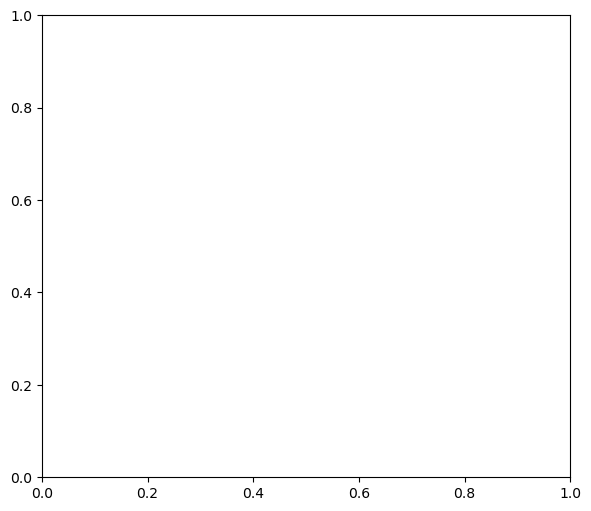

In [177]:
labels = ["1","0"]
labels1 = ["1","0"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Target - Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, after_smote)
plt.title("Target - Numbers After Balancing")
plt.show()

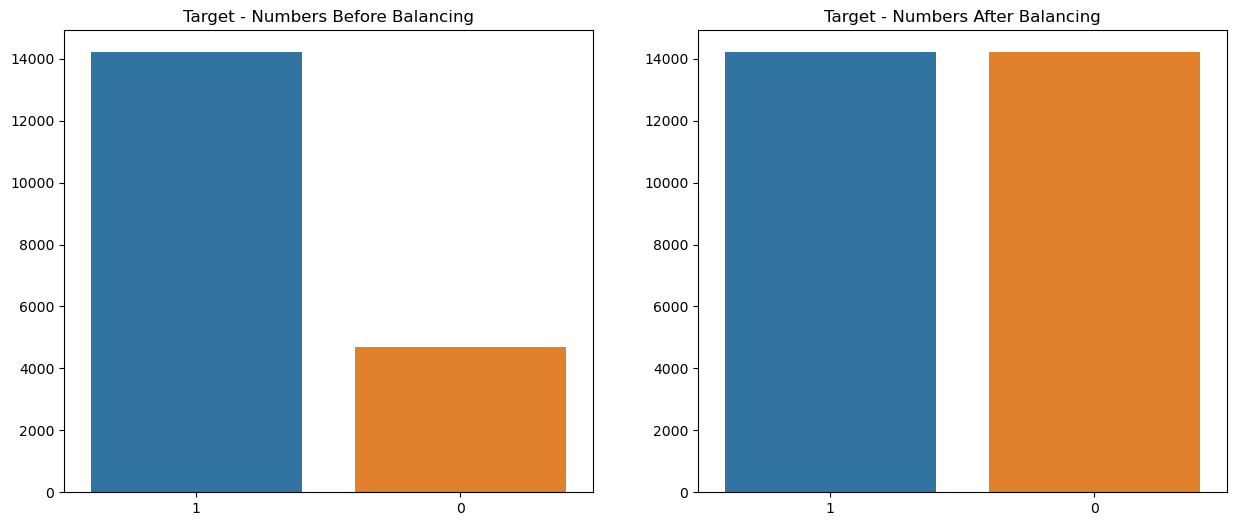

In [178]:
labels = ["1", "0"]
labels1 = ["1", "0"]
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Target - Numbers Before Balancing")
plt.subplot(1, 2, 2)
sns.barplot(x=labels, y=after_smote)
plt.title("Target - Numbers After Balancing")
plt.show()

XGBoost (Extreme Gradient Boosting) 

It is based on gradient boosting frame work which is an ensemble learning method that combines the predictions of multiple weak models(usually decision trees) to cretae a a stronger model. Regularization techniques are used such as Lasso and Ridge regularization whihc prevent overfitting and improve model generalization .  

Handling missing values : XGBoost can automatically handle missing values during and training ans prediction reducing the needs for data preprocessing. 

Flexibility : Xg Boost can handle a avariety of data types including numerical and categorical features. So it can support both classification and regression problems. 

Feature Importance : Xg Boost provides feature imporatnce scores allowing us to identufy which features have the most impact on model predictions. 

Tree Pruning: XG Boost uses an efficient algorithm for tree pruning which improves teh algorithms' performance and helps overfitting. 

step 1 - we fill fit decision tree / other model each time

step 2- we do tree pruning to take only till that leaf node after which I donot need much. This is done to prevent over fitting

step 3 - I will go on fitting multiple time the models and understand the prediction from each time model build

step 4 - suppose there are 100 replications for building the model. And out of that 82 are suggestiong us with the conclusion to accept the offer

Remaining are telling us to reject the offer

 Then we choose the one which is majority of the cases as per our final conclusion
 
 This is doing ensemble learning and converting weak models multiple times to create and generate strong models which can capture the model complexity better
 
 But we also have to keep in mind that it does not land up into overfitting the model for which we shall apply regularisation techniques like Ridge and Lasso and ensure it prevents overfitting
 
 Cross-Validation: XGBoost includes built-in cross-validation support, helping you tune hyperparameters and assess model performance.
 
 Scalability: XGBoost can handle large datasets
 
 Usage of XGBoost:

Classification: XGBoost is often used for binary and multiclass classification tasks, such as predicting customer churn, fraud detection, and image classification.

Regression: XGBoost can be applied to regression problems, such as predicting house prices, stock prices, or other continuous target variables.

Anomaly Detection: XGBoost can identify anomalies in data by building a model that learns the normal behavior and flags unusual instances.

Time Series Forecasting: XGBoost can be applied to time series forecasting problems, such as predicting stock prices or energy consumption.


In [179]:
!pip install xgboost

In [180]:
import xgboost

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote ,test_size = 0.25, 
                                                    random_state=42)

In [182]:
X_train

city  city_development_index  gender  relevent_experience  \
20983    21                   0.624       1                    0   
25554    21                   0.624       1                    0   
11912   103                   0.920       1                    1   
21496    21                   0.624       1                    0   
8696    100                   0.887       1                    1   
...     ...                     ...     ...                  ...   
21575   114                   0.926       1                    0   
5390    103                   0.920       1                    1   
860      16                   0.910       1                    0   
15795   136                   0.897       1                    1   
23654    21                   0.624       1                    0   

       enrolled_university  education_level  major_discipline  experience  \
20983                    2                3                 5          19   
25554                    2                2                 5           6   
11912                    0                2                 5           3   
21496                    0                3                 5           4   
8696                     2                2                 3          21   
...                    ...              ...               ...         ...   
21575                    0                2                 5           8   
5390                     2                2                 0           4   
860                      2                2                 5           9   
15795                    0                2                 5           1   
23654                    2                2                 5           5   

       company_size  company_type  last_new_job  training_hours  
20983             3             5             5        1.203091  
25554             2             5             4        1.285724  
11912             0             0             3        0.941783  
21496             5             5             4        1.251098  
8696              3             5             5        1.114655  
...             ...           ...           ...             ...  
21575             3             5             1        1.277470  
5390              7             5             3        1.405215  
860               1             1             1        1.079551  
15795             3             5             0        1.314292  
23654             2             5             3        1.247690  

[21315 rows x 12 columns]

In [183]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
X_train

array([[0.11173184, 0.30851064, 0.5       , ..., 1.        , 1.        ,
        0.59910802],
       [0.11173184, 0.30851064, 0.5       , ..., 1.        , 0.8       ,
        0.72082736],
       [0.5698324 , 0.93829787, 0.5       , ..., 0.        , 0.6       ,
        0.21419811],
       ...,
       [0.08379888, 0.91702128, 0.5       , ..., 0.2       , 0.2       ,
        0.41713282],
       [0.75418994, 0.8893617 , 0.5       , ..., 1.        , 0.        ,
        0.76290758],
       [0.11173184, 0.30851064, 0.5       , ..., 1.        , 0.6       ,
        0.66480305]])

Min Max scaler helps us to scale teh features ( independent variables) to a specific range typically between 0 and 1.It tranforms each feature by subtracting the minimumvalue and then diving bythe range (max-min) of the feature. 

X_scaled = (X - X_min) / (X_max - X_min)

This normalization process ensures that all features are on a similar scale whihc can be especially important for alogorithms that are sensitive to the scales of input features, such as gradient based optimization alogirithms.(eg. XG Boost)




In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [186]:
models = []
models.append(('Logistic Regression' ,LogisticRegression(random_state=42)))
models.append(('CART', DecisionTreeClassifier(random_state = 42)))
models.append(('XGBoost', GradientBoostingClassifier(random_state = 42)))
models.append(('GradientBoosting', GradientBoostingClassifier(random_state = 42)))
results = []
names = []

In [187]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score


In [188]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : 0.6729064039408867
CART : 0.7124560168895144
XGBoost : 0.7341308937368051
GradientBoosting : 0.7341308937368051


When you set a fixed value for random_state, the algorithm will produce the same results every time you run it with the same data and parameters. This can be helpful for debugging, testing, and comparing different model configurations.
The random_state parameter is used to initialize the random number generator. Setting a specific value for random_state ensures that the random processes involved in the algorithm are reproducible. This is particularly useful when you want to share or replicate your results.

In [189]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        precision = precision_score(y_test, y_pred)
        print("{} : {}".format(name,precision))

Logistic Regression : 0.698208110657026
CART : 0.7056
XGBoost : 0.7602823818293432
GradientBoosting : 0.7602823818293432


In [190]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        recall = recall_score(y_test, y_pred)
        print("{} : {}".format(name,recall))

Logistic Regression : 0.6195258019525802
CART : 0.7380753138075313
XGBoost : 0.6909344490934449
GradientBoosting : 0.6909344490934449


In [191]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1_score = f1_score(y_test, y_pred)
        print("{} : {}".format(name,f1_score))

Logistic Regression : 0.6565178835353237


TypeError: 'numpy.float64' object is not callable

In [ ]:
from sklearn.metrics import f1_score


In [ ]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = f1_score(y_test, y_pred)
        print("{} : {}".format(name,score))

In [ ]:
y_pred


In [ ]:
y_test

In [194]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy= f1_score(y_test, y_pred)
    print("{} : {}".format(name, accuracy))

TypeError: 'numpy.float64' object is not callable

In [195]:
for name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = confusion_matrix(y_test, y_pred)
        print("{} : {}".format(name,accuracy))

Logistic Regression : [[2560  960]
 [1364 2221]]
CART : [[2416 1104]
 [ 939 2646]]
XGBoost : [[2739  781]
 [1108 2477]]
GradientBoosting : [[2739  781]
 [1108 2477]]


In [ ]:
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy= f1_score(y_test, y_pred)
    print("{} : {}".format(name, accuracy))